In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings

# Ignore all warnings
warnings.simplefilter("ignore")
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Summary

In [3]:
d1=pd.read_csv(r"D:\Empty\Kaggle\datasets\Billionaires Statistics Dataset.csv")
d1.head(6)

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
5,6,104000,Technology,Bill Gates,67.0,United States,Medina,Microsoft,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [4]:
data=d1.copy()

# Data Exploration

In [5]:
print(f"The shape of the DataFrame is:{d1.shape}")
print(f"The size of the DataFrame is:{d1.size}")

The shape of the DataFrame is:(2640, 35)
The size of the DataFrame is:92400


In [6]:
d1.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

* Numerical-rank,finalworth,age,
* Categorial-category,country,city,industries,organization,selfmade,status,gender
* Mixed- personName,source,birthdate

In [7]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [8]:
d1.isnull().sum()

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

  **Percentage of null values**

In [9]:
missing_df=d1.isnull().sum().to_frame().rename(columns={0:"Missing Values"})
missing_df["Percentage of missing values"]=(round((d1.isnull().sum()*100)/(len(d1)),2).astype(str)+"%")
missing_df


,Missing Values,Percentage of missing values
rank,0,0.0%
finalWorth,0,0.0%
category,0,0.0%
personName,0,0.0%
age,65,2.46%
country,38,1.44%
city,72,2.73%
source,0,0.0%
industries,0,0.0%
countryOfCitizenship,0,0.0%


In [10]:
d1["country"].unique()
d1["country"].nunique()

78

In [11]:
d1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rank,2640.0,1.289159e+03,7.396937e+02,1.000000,6.590000e+02,1.312000e+03,1.905000e+03,2.540000e+03
finalWorth,2640.0,4.623788e+03,9.834241e+03,1000.000000,1.500000e+03,2.300000e+03,4.200000e+03,2.110000e+05
age,2575.0,6.514019e+01,1.325810e+01,18.000000,5.600000e+01,6.500000e+01,7.500000e+01,1.010000e+02
birthYear,2564.0,1.957183e+03,1.328252e+01,1921.000000,1.948000e+03,1.957000e+03,1.966000e+03,2.004000e+03
birthMonth,2564.0,5.740250e+00,3.710085e+00,1.000000,2.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01
birthDay,2564.0,1.209984e+01,9.918876e+00,1.000000,1.000000e+00,1.100000e+01,2.100000e+01,3.100000e+01
cpi_country,2456.0,1.277552e+02,2.645295e+01,99.550000,1.172400e+02,1.172400e+02,1.250800e+02,2.885700e+02
cpi_change_country,2456.0,4.364169e+00,3.623763e+00,-1.900000,1.700000e+00,2.900000e+00,7.500000e+00,5.350000e+01
gross_tertiary_education_enrollment,2458.0,6.722567e+01,2.134343e+01,4.000000,5.060000e+01,6.560000e+01,8.820000e+01,1.366000e+02
gross_primary_education_enrollment_country,2459.0,1.028585e+02,4.710977e+00,84.700000,1.002000e+02,1.018000e+02,1.026000e+02,1.421000e+02


In [12]:
d1["country"].duplicated().sum()

2561

# Data Accessing

* Numerical-rank,finalworth,age,
* Categorial-category,country,city,industries,organization,selfmade,status,gender
* Mixed- personName,source,birthdate

# Defining the Problems


1. **Wealth Distribution:**
   - What is the distribution of wealth among different categories?
   - Are there certain industries that dominate the top ranks in terms of wealth?

2. **Geographical Analysis:**
   - Which countries have the highest representation among the wealthiest individuals?
   - Is there a correlation between the country of citizenship and the individual's current residence?

3. **Age and Wealth:**
   - How does the age of billionaires correlate with their wealth?
   - Are there notable differences in the wealth distribution among different age groups?

4. **Industry Insights:**
   - Which industries have the highest concentration of billionaires?
   - Are there specific industries that consistently appear among the top ranks?

5. **Source of Wealth:**
   - What are the primary sources of wealth for the billionaires in the dataset?
   - Is there a relationship between the source of wealth and the total worth of an individual?

6. **Country-specific Analysis:**
   - Can we identify any economic indicators (e.g., GDP, tax rates) that correlate with the number or wealth of billionaires in a country?
   - How does life expectancy in a country correlate with the wealth of its billionaires?

7. **Population and Wealth:**
   - Is there a correlation between the population of a country and the number of billionaires it has?
   - How does the wealth of individuals compare across countries with different population sizes?

8. **Spatial Analysis:**
   - Can we visualize the geographical distribution of billionaires on a world map?
   - Are there clusters or patterns in the distribution of billionaires based on latitude and longitude?

9. **Gender Representation:**
   - What is the gender distribution among the billionaires in the dataset?
   - Are there notable differences in wealth between male and female billionaires?

10. **Educational Insights:**
    - Is there a correlation between the level of education (e.g., tertiary education enrollment) in a country and the wealth of its billionaires?

In [13]:
d1.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

1. **Wealth Distribution:**
   - What is the distribution of wealth among different categories?
   - Are there certain industries that dominate the top ranks in terms of wealth?

## Conclusion:
### Top Industries Ranking in Wealth

1. **Automotive**.
2. **Technology**
3. **Telecom**
4. **Logistics**
5. **Metals and Mining**
### Insights:
- These industries dominate the top ranks in wealth, emphasizing their economic significance and success.
- The financial achievements within each sector contribute to the overall diversity of wealth distribution.

Text(0.5, 1.0, 'Wealth distribution based on industries or categories')

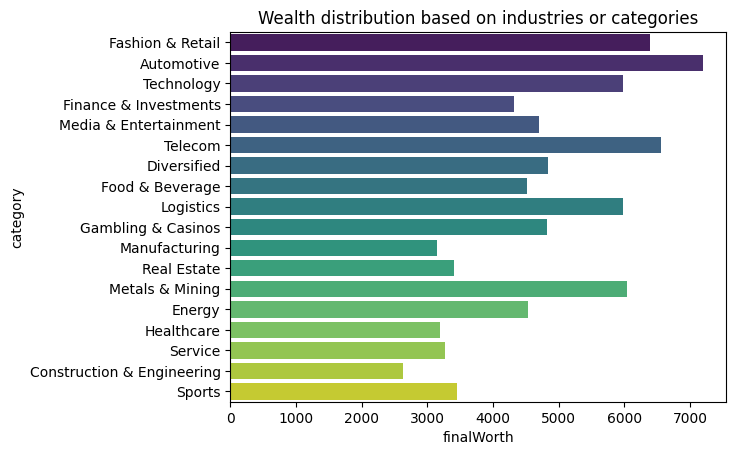

In [14]:
sorted_df=d1.sort_values(by='finalWorth', ascending=False)
sns.barplot(data=sorted_df,x="finalWorth",y="category",palette='viridis',errorbar=None)
plt.title("Wealth distribution based on industries or categories")

## **2. Industry Insights:**
   - Which industries have the highest concentration of billionaires?
   - Which industries have the highest representation among the individuals in the dataset?
  
## Conclusion:
   - Food and beverages,Finance and investments, manufacturing, technology, fashion and retail,energy, healthcare have the highest concentration of billionaires.
   - Finance and investments, manufacturing, technology, fashion and retail are the sectors which contains most male billionaires.
   - Whereas the female billionaires are mainly seen in fashion and retail, food and beverages, and manufacturing industries.
   - Based on the analysis, it can be concluded that the majority of billionaires fall within the age bracket of 50 to 70.

Text(0.5, 1.0, 'Industries with highest representation')

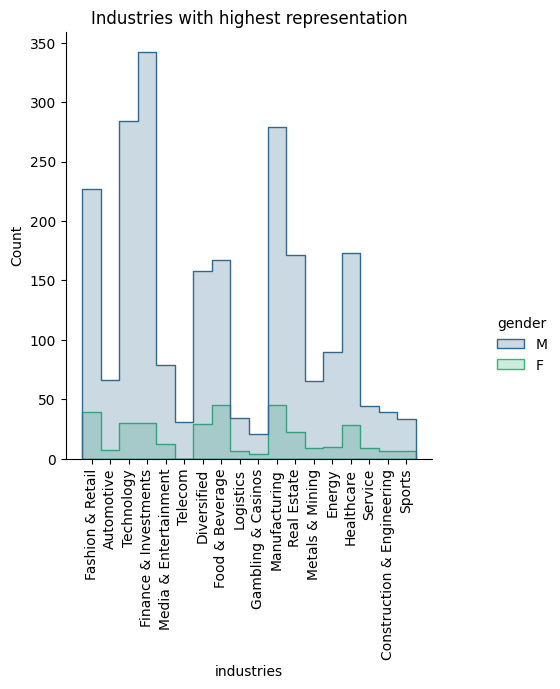

In [15]:
sns.displot(data=d1,x="industries",hue="gender",palette="viridis",element="step")
plt.xticks(rotation="vertical")
plt.title("Industries with highest representation")

In [16]:
d1["age"].fillna(d1["age"].mode()[0],inplace=True)

In [17]:
data["age"].fillna(data["age"].mean(),inplace=True)

In [18]:
px.histogram(d1,x="age")

The skewness of age column is: -0.07903682421854166


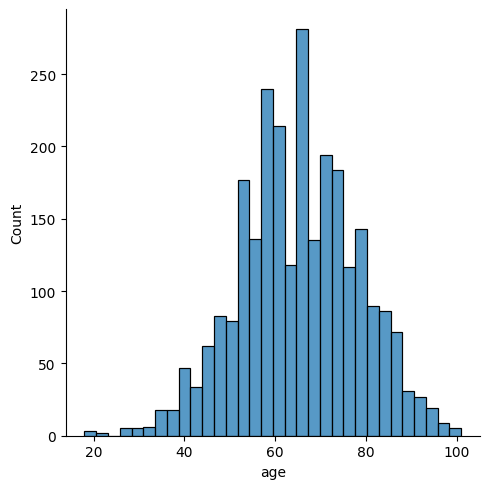

In [19]:
print("The skewness of age column is:",data["age"].skew())
sns.displot(data=data,x="age",kind="hist")

## 3. **Geographical Analysis:**
   - Which countries have the highest representation among the wealthiest individuals?
   - Is there a correlation between the country of citizenship and the individual's current residence?

## Conclusion:
   - The top five countries with most billionaires are UNited States, China, India, Germany, and United Kingdom.
   - The high Cramér's V value suggests that there is a substantial relationship between the country of residence and the country of citizenship in the dataset.

In [20]:
d1["country"].value_counts().head(5).to_frame()

,count
country,
United States,754
China,523
India,157
Germany,102
United Kingdom,82


In [21]:
d1["country"].value_counts()

country
United States           754
China                   523
India                   157
Germany                 102
United Kingdom           82
                       ... 
Portugal                  1
Georgia                   1
Eswatini (Swaziland)      1
Uzbekistan                1
Armenia                   1
Name: count, Length: 78, dtype: int64

In [22]:
d1["countryOfCitizenship"].value_counts()

countryOfCitizenship
United States           735
China                   491
India                   169
Germany                 126
Russia                  104
                       ... 
Belize                    1
Eswatini (Swaziland)      1
Venezuela                 1
Algeria                   1
Panama                    1
Name: count, Length: 77, dtype: int64

In [23]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(d1["country"], d1["countryOfCitizenship"])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square value: {chi2}, p-value: {p}")

Chi-square value: 132750.7197374479, p-value: 0.0


In [24]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate Cramér's V
association_strength = cramers_v(contingency_table)
print(f"Cramér's V: {association_strength}")

Cramér's V: 0.8185133547927517


## **4.Age and Wealth:**
   - How does the age of billionaires correlate with their wealth?
   - Are there notable differences in the wealth distribution among different age groups?

## Conclusion:
   - A correlation coefficient of 0.069 is close to zero, suggesting a weak positive correlation. This means that as one variable (age) increases, the other variable (final worth) tends to increase slightly, but the relationship is not strong.
   - Yes, there is a notable difference in the wealth distribution i.e., the people of age less than 50 have net worth less when compared to that of people of age greater than 50.

In [25]:
d1.age.fillna(d1.age.mode()[0],inplace=True)
d1.age.isnull().sum()

0

In [26]:
from scipy.stats import pearsonr
corr, _ = pearsonr(d1.age,d1.finalWorth)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.069


In [27]:
px.bar(d1,x="age",y="finalWorth")

## 5. **Source of Wealth:**
   - What are the primary sources of wealth for the billionaires in the dataset?
   - Is there a relationship between the source of wealth and the total worth of an individual?

## Conclusion


In [28]:
d1.source.nunique()

906

In [29]:
d1.source.value_counts()                

source
Real estate                     151
Investments                      92
Diversified                      91
Pharmaceuticals                  85
Software                         63
                               ... 
Chemical industry                 1
Readymade garments                1
Stock brokerage                   1
Nutrition, wellness products      1
Tyre manufacturing machinery      1
Name: count, Length: 906, dtype: int64

In [30]:
px.histogram(d1,x="source")

In [36]:
from scipy.stats import kurtosis,skew
kur=kurtosis(d1["age"])
kur

-0.1387691447141699

In [37]:
skew(d1["age"])

-0.051088117525369715

In [42]:
d1.age.mean()

65.01363636363637

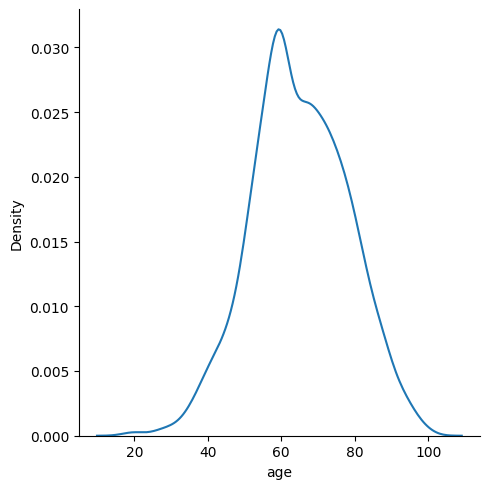

In [41]:
sns.displot(data=d1,x="age",kind="kde")

In [40]:
kurtosis(d1["finalWorth"])

144.7967937167552

In [38]:
skew(d1["finalWorth"])

10.006677577919163

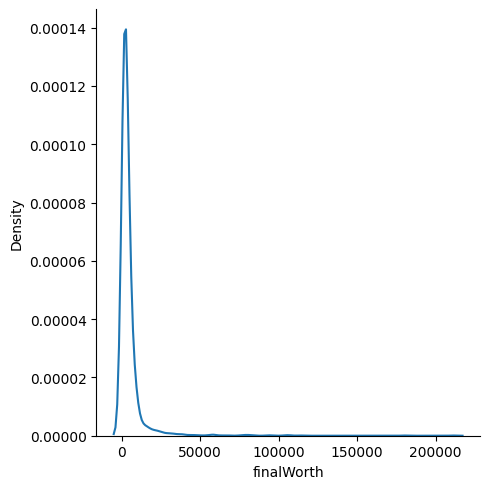

In [39]:
sns.displot(data=d1,x="finalWorth",kind="kde")